In [1]:
# Author : 4기 이아림 

In [1]:
import urllib.parse
import pandas as pd
import FinanceDataReader as fdr
import matplotlib.pyplot as plt
import numpy as np

In [2]:
MARKET_CODE_DICT = {
    'kospi' : 'stockMkt',
    'kosdaq' : 'kosdaqMkt',
    'konex' : 'konexMkt'
}

In [3]:
DOWNLOAD_URL = 'http://kind.krx.co.kr/corpgeneral/corpList.do'

In [4]:
# 종목코드가 6자리가 될 수 있도록 해주는 함수

In [5]:
def zeroFill(columnValue):
    columnValue = str(columnValue)
    outValue = columnValue.zfill(6)
    return outValue

In [6]:
# MARKET에서 정보 불러오는 함수

In [7]:
def get_stock_codes(market=None, delisted=False):
    params = {'method':'download'}
    if market.lower() in MARKET_CODE_DICT:
        params['marketType'] = MARKET_CODE_DICT[market]
        print(market.lower()+"market key is exist")
    else:
        print("invalid market")
    params_String = urllib.parse.urlencode(params)
    request_url = DOWNLOAD_URL + "?" + params_String
    df = pd.read_html(request_url)[0]
    df['종목코드'] = df.종목코드.apply(zeroFill)
    return df

In [8]:
stocks = get_stock_codes('kospi')

kospimarket key is exist


In [9]:
# stocks

In [10]:
# posc 구할 때 설정하는 비율 (총합이 100!)
# a = SMA
# b = WMA
# c = EMA

In [11]:
a=20 
b=30
c=50

In [12]:
# 구하고 싶은 종목 입력

In [13]:
target = input()

035720


In [30]:
# 구하고자 하는 종목 해당 업종에 속한 모든 종목들 코드 가져오기

In [14]:
seekCode = target

In [15]:
def get_seekLists(seekCode):
    seekRow = stocks.loc[stocks.종목코드.str.upper() == seekCode.upper() ]
    seekIndustry = seekRow.업종
    seekIndustrys = seekIndustry.to_list()
    seekRows = stocks.loc[(seekIndustrys[0] == stocks.업종.str.upper())]
    seekLists = seekRows.종목코드.to_list()
    return seekLists

In [16]:
seekLists = get_seekLists(seekCode)

In [17]:
df = fdr.DataReader(target) # 이 부분이 없으면 Class 안돌아감 (이유분석필요)

In [27]:
class StockPosc:
    def __init__(self, stockCode,a, b, c):
        self.stockCode = stockCode
        self.df= fdr.DataReader(stockCode, '2020-01-01')
        self.a = a
        self.b = b
        self.c = c
        
    def get_poscSMA(self):
        df['sma10'] = self.df['Close'].rolling(10).mean()
        df['sma20'] = self.df['Close'].rolling(20).mean()
        poscSMA = ((df['sma10']-df['sma20'])/df['sma10'])*100
        return poscSMA 

    
    def weighted_mean(weight_array):
        def inner(x):
            return(weight_array*(x)).mean()
        return inner

    def get_poscWMA(self):
        weights = np.arange(1,11)
        weights
        df['wma10'] =self.df['Close'].rolling(10).apply(lambda prices:np.dot(prices, weights)/weights.sum(), raw=True)
        weights = np.arange(1,21)
        df['wma20'] = self.df['Close'].rolling(20).apply(lambda prices:np.dot(prices, weights)/weights.sum(), raw=True)
        poscWMA = ((df['wma10']-df['wma20'])/df['wma10'])*100
        return poscWMA

    def get_poscEMA(self):
        df['ema10'] = self.df['Close'].ewm(10).mean()
        df['ema20'] = self.df['Close'].ewm(20).mean()
        poscEMA = ((df['ema10']-df['ema20'])/df['ema10'])*100
        return poscEMA
    
    def get_posc(self):
        posc = ((self.get_poscSMA())*((self.a)/100) + (self.get_poscWMA())*((self.b)/100) + (self.get_poscEMA())*((self.c)/100))
        return posc  

In [28]:
# 해당 업종에 속한 모든 종목들의 평균 posc 구하기. (target Industry posc)

In [29]:
SumStockPosc = 0
AvgSumStockPosc = 0
for i in range(0, len(seekLists)):
    SumStockPosc += (StockPosc(seekLists[i],a,b,c).get_posc())
    AvgSumStockPosc = SumStockPosc / len(seekLists)

In [30]:
# 해당 종목의 posc 그래프

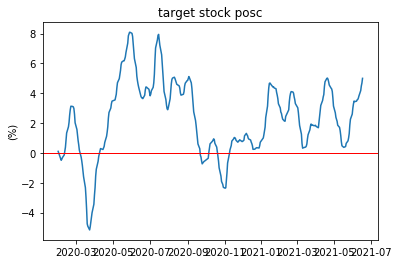

In [31]:
targetStock=StockPosc(seekCode,a,b,c)
plt.plot(targetStock.get_posc())
plt.axhline(y=0, color='r', linewidth=1)
plt.title("target stock posc")
plt.ylabel("(%)")
plt.show()

In [23]:
# 해당 종목 산업에 속한 종목들의 평균 posc 그래프

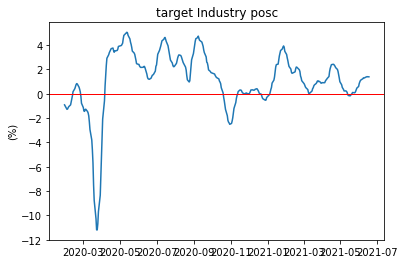

In [24]:
plt.plot(AvgSumStockPosc)
plt.axhline(y=0, color='r', linewidth=1)
plt.title("target Industry posc")
plt.ylabel("(%)")
plt.show()

In [25]:
# 해당 종목의 종가 변화

Text(0.5, 1.0, 'target stock Close')

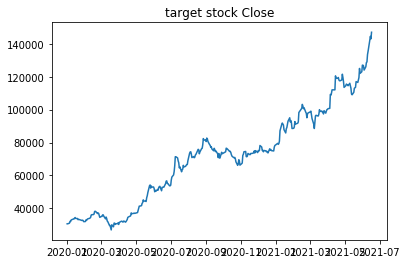

In [26]:
df = fdr.DataReader(target,'2020-01-01')
plt.plot(df.Close)
plt.title("target stock Close")

###